In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
print(X.shape, y.shape)

(150, 4) (150,)


In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
print(knn.predict([[5.0, 3.6, 1.3, 0.25]]))

[0]


In [11]:
print(X[-7:-5])

[[6.8 3.2 5.9 2.3]
 [6.7 3.3 5.7 2.5]]


In [12]:
print(y[-7:-5])

[2 2]


In [13]:
print(knn.predict([[6.5, 3.0, 5.2, 2.0]]))

[2]


In [14]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X, y)
print(logreg.predict([[5.0, 3.6, 1.3, 0.25]]))

[0]


/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
print(logreg.predict([[6.5, 3.0, 5.2, 2.0]]))

[2]


In [16]:
y_pred_knn = knn.predict(X)
y_pred_logreg = logreg.predict(X)

In [17]:
y_pred_knn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
y_pred_logreg

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
from sklearn import metrics
print("KNN accuracy:", metrics.accuracy_score(y, y_pred_knn))
print("Logistic Regression accuracy:", metrics.accuracy_score(y, y_pred_logreg))

KNN accuracy: 0.96
Logistic Regression accuracy: 0.9733333333333334


In [20]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
knn_five = KNeighborsClassifier(n_neighbors=3)
knn_five.fit(X_train, y_train)
y_pred = knn_five.predict(X_test)
print("Test set accuracy with k=5:", metrics.accuracy_score(y_test, y_pred))

Test set accuracy with k=5: 0.9833333333333333


In [21]:
logreg1 = LogisticRegression()
logreg1.fit(X_train, y_train)
y_pred_logreg1 = logreg1.predict(X_test)
print("Test set accuracy with Logistic Regression:", metrics.accuracy_score(y_test, y_pred_logreg1))

Test set accuracy with Logistic Regression: 1.0


In [22]:
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred_k))

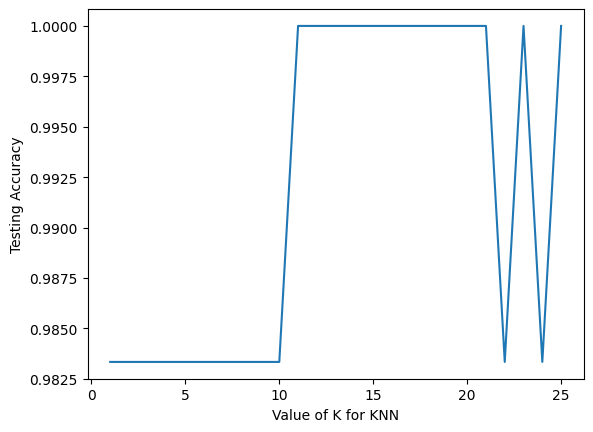

In [23]:
import matplotlib.pyplot as plt
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()  